In [262]:
%load_ext autoreload
%autoreload
import ross_heuristic
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [190]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

In [263]:
hf = ross_heuristic.heuristic_functions()
tf = ross_heuristic.testing_functions()

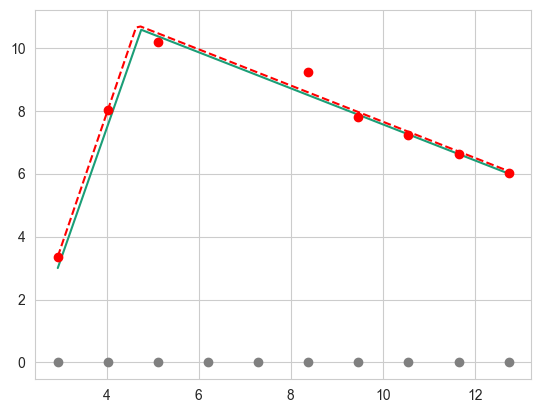

In [294]:
num_points = 10
traj = tf.generate_traj(1)
sampled_pts = tf.sample_traj(traj, num_points) 
true_coeffs = hf.get_coeffs(traj[0,1], sampled_pts)
# error_x = np.random.normal(0, 0.1, num_points)
error_y = np.random.normal(0, 0.3, num_points)
sampled_pts = np.array([sampled_pts[:,0], sampled_pts[:,1] + error_y]).T

num_iter = 5
c_val_step = 0.01
overall_min = 100000
changepoint, coeffs, taken_points = hf.ross_heuristic(sampled_pts, num_iter, c_val_step)
alpha, beta_1, beta_2 = coeffs[-1]
pred_x = np.arange(traj[0,0], traj[0,2], 0.1)
pred_y = hf.predictor(alpha, beta_1, beta_2, changepoint, pred_x)

plt.plot(traj[0], traj[1], zorder = 1, label = "True Trajectory")
plt.scatter(taken_points[:,0], taken_points[:,-1], zorder = 2, color = "red", label = "Initial Points")
plt.plot(pred_x, pred_y, zorder = 2, color = "red", ls = "dashed")
plt.scatter(sampled_pts[:,0], [0] * num_points, zorder = 3, label = "Frozen Points", color = "gray")

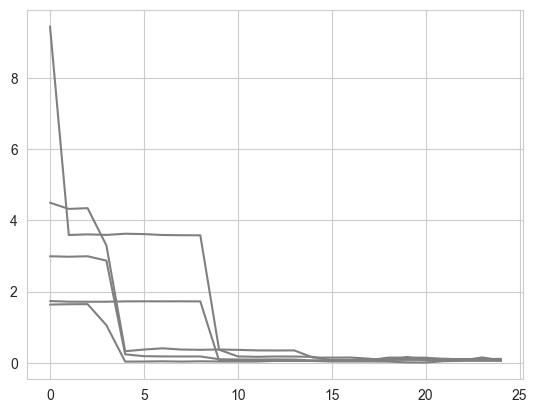

In [295]:
for i in range(5):
    num_points = 100
    num_iter = 25
    traj = tf.generate_traj(1)
    sampled_pts = tf.sample_traj(traj, num_points) 
    true_coeffs = hf.get_coeffs(traj[0,1], sampled_pts)
    # error_x = np.random.normal(0, 0.1, num_points)
    error_y = np.random.normal(0, 0.1, num_points)
    sampled_pts = np.array([sampled_pts[:,0], sampled_pts[:,1] + error_y]).T

    c_val_step = 0.01
    overall_min = 100000
    changepoint, coeffs, taken_points = hf.ross_heuristic(sampled_pts, num_iter, c_val_step)
    accuracy = [math.dist(true_coeffs, coeff) for coeff in coeffs]
    plt.plot(range(num_iter), accuracy, color = "gray")